# Notebook for making table with quality comparasion and disperssion of different feature datasets (TableS2-S10)

In [1]:
# Configutation part #

# Output of lr_snp_indel.py
snp_indel_dir = './output/snp_indel'
# Output of lr_snp_indel_thr1.py
snp_indel_thr1_dir = './output/snp_indel_thr1'
# Output of lr_snp_indel_pfam.py
snp_indel_pfam_dir = './output/snp_indel_pfam'
# Output of lr_snp_indel_broken.py
snp_indel_broken_dir = "./output/snp_indel_broken"
# Output of lr_snp_indel_aggr.py
snp_indel_aggr_dir = "./output/snp_indel_aggr"
# Output directory
output_dir = './result_feature_sets'

######################

In [1]:
import os

import pandas as pd
import numpy as np

import seaborn as sns

from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
from scipy.stats import ranksums

import matplotlib.pyplot as plt

In [2]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

drugs = ['Rifampicin',
         'Isoniazid',
         'Pyrazinamide',
         'Ethambutol',
         'Streptomycin',
         'Kanamycin',
         'Amikacin',
         'Capreomycin',
            'Ofloxacin',
         'Moxifloxacin',
         'Ciprofloxacin',
        'Ethionamide',
         'Prothionamide']

drug_with_groups = { 'Rifampicin': 'Rifampicin',
                     'Isoniazid': 'Isoniazid',
                     'Pyrazinamide': 'Pyrazinamide',
                     'Ethambutol': 'Ethambutol',
                     'Streptomycin': 'Streptomycin',
                    'First line': ["Isoniazid", 
                                    "Rifampicin", 
                                    "Pyrazinamide", 
                                    "Ethambutol", 
                                    "Streptomycin"],
                        'Kanamycin': 'Kanamycin',
                         'Amikacin': 'Amikacin',
                         'Capreomycin': 'Capreomycin',
                            'Aminoglycosides': ['Amikacin', 
                                                'Kanamycin', 
                                                'Capreomycin', 
                                                "Streptomycin"],
                        'Moxifloxacin': 'Moxifloxacin',
                        'Ofloxacin': 'Ofloxacin',
                        'Ciprofloxacin': 'Ciprofloxacin',
                        'Fluoroquinolones': ['Moxifloxacin', 
                                             'Ofloxacin', 
                                             'Ciprofloxacin'],
                        'Ethionamide': 'Ethionamide',
                        'Prothionamide': 'Prothionamide',
                          'Second line': ["Amikacin", 
                                         "Ciprofloxacin", 
                                         "Kanamycin", 
                                         "Ofloxacin", 
                                         "Capreomycin",
                                        "Ethionamide",
                                        "Prothionamide",
                                        "Moxifloxacin"],
                        'All drugs': drugs
}

groups = { 'First line': ["Isoniazid", 
                "Rifampicin", 
                "Pyrazinamide", 
                "Ethambutol", 
                "Streptomycin"],
          'Second line': ["Amikacin", 
                 "Ciprofloxacin", 
                 "Kanamycin", 
                 "Ofloxacin", 
                 "Capreomycin",
                "Ethionamide",
                "Prothionamide",
                "Moxifloxacin"],
          'Aminoglycosides': ['Amikacin', 'Kanamycin', 'Capreomycin', "Streptomycin"],
          'Fluoroquinolones': ['Moxifloxacin', 'Ofloxacin', 'Ciprofloxacin'],
          'All drugs': drugs
}

## Supplement Functions

In [3]:
def f1_score(TP, FP, FN):
    return TP/(TP + 1/2*(FP + FN))

## Average dispersion for different feature sets

In [3]:
result = pd.DataFrame(index=drugs, columns=['SNPs & Indels without filration', 
                                            'SNPs & Indels & PFAM',
                                            'SNPs & Indels & Broken gene',
                                            'SNPs & Indels & Aggr. gene'])
for drug in drugs:
    data = pd.read_csv(f"{snp_indel_thr1_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    temp = data[['n_iter', 'auc']].groupby('n_iter').mean()
    result.loc[drug, 'SNPs & Indels without filration'] = np.var(temp, ddof=1)[0]
    
    data = pd.read_csv(f"{snp_indel_pfam_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    temp = data[['n_iter', 'auc']].groupby('n_iter').mean()
    result.loc[drug, 'SNPs & Indels & PFAM'] = np.var(temp, ddof=1)[0]
    
    data = pd.read_csv(f"{snp_indel_broken_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    temp = data[['n_iter', 'auc']].groupby('n_iter').mean()
    result.loc[drug, 'SNPs & Indels & Broken gene'] = np.var(temp, ddof=1)[0]
    
    data = pd.read_csv(f"{snp_indel_aggr_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    temp = data[['n_iter', 'auc']].groupby('n_iter').mean()
    result.loc[drug, 'SNPs & Indels & Aggr. gene'] = np.var(temp, ddof=1)[0]

In [4]:
result.to_csv(f"{output_dir}/TableS8.csv", sep='\t', index=True, header=True)

## Comparation of different sets (Figure 2)

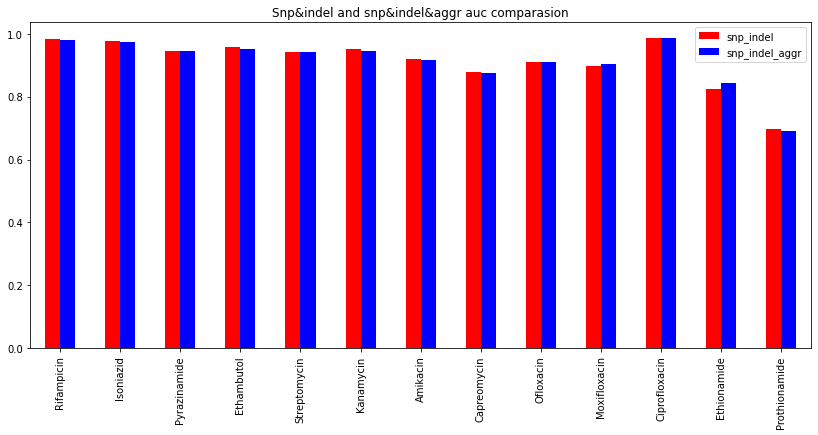

<Figure size 2160x4320 with 0 Axes>

In [10]:
result = pd.DataFrame(columns=['snp_indel', 'snp_indel_aggr', 'p-value'])
k = 0
for drug in drugs:
    data = pd.read_csv(f"{snp_indel_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    temp_1 = data[['n_iter', 'auc']].groupby('n_iter').mean()
    
    
    data = pd.read_csv(f"{snp_indel_aggr_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    temp_2 = data[['n_iter', 'auc']].groupby('n_iter').mean()
    
    pvalue = ttest_rel(temp_1['auc'], temp_2['auc'])[1]
    
    result.loc[drug] = [temp_1.mean()[0], temp_2.mean()[0], pvalue]
    k += 1

xticks = drugs
Scores = result[['snp_indel', 'snp_indel_aggr']]

names = ["snp_indel", "snp_indel_aggr"]
fig, ax = plt.subplots()

plt.title('Snp&indel and snp&indel&aggr auc comparasion')
pd.DataFrame(Scores, index=xticks, columns=names).plot.bar(figsize=(14,6), ax=ax, color=['red', 'blue'])
plt.figure(figsize=(30,60))


plt.show()

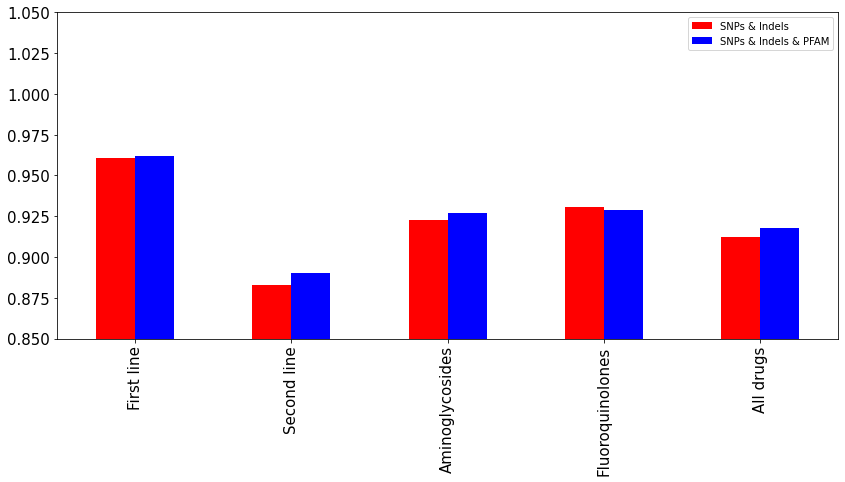

<Figure size 2880x7200 with 0 Axes>

In [11]:
result = pd.DataFrame(columns=['SNPs & Indels', 'SNPs & Indels & PFAM', 'p-value'])
k = 0
for drug in drugs:
    data = pd.read_csv(f"{snp_indel_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    temp_1 = data[['n_iter', 'auc']].groupby('n_iter').mean()
    
    data = pd.read_csv(f"{snp_indel_pfam_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    temp_2 = data[['n_iter', 'auc']].groupby('n_iter').mean()
    
    pvalue = ttest_rel(temp_1['auc'], temp_2['auc'])[1]
    
    result.loc[drug] = [temp_1.mean()[0], temp_2.mean()[0], pvalue]
    k += 1
    
new_result = pd.DataFrame(columns=['SNPs & Indels', 'SNPs & Indels & PFAM'])
for key in groups.keys():
    new_result.loc[key] = np.mean(result.loc[groups[key]], axis=0)
    
xticks = new_result.index
Scores = new_result[['SNPs & Indels', 'SNPs & Indels & PFAM']]

names = ["SNPs & Indels", "SNPs & Indels & PFAM"]
fig, ax = plt.subplots()

ax.xaxis.label.set_size(50)
pd.DataFrame(Scores, index=xticks, columns=names).plot.bar(figsize=(14,6), ylim=(0.85, 1.05), 
                                                           fontsize=15, ax=ax, color=['red', 'blue'])
plt.figure(figsize=(40,100))


plt.show()

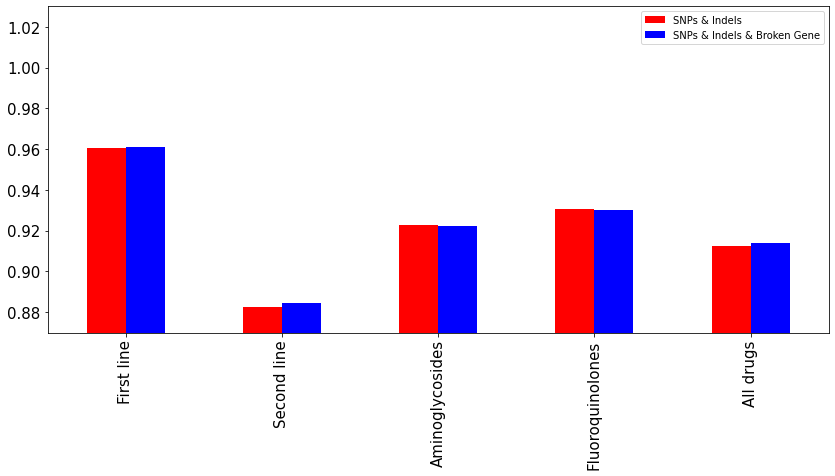

<Figure size 2160x4320 with 0 Axes>

In [12]:
result = pd.DataFrame(columns=['SNPs & Indels', "SNPs & Indels & Broken Gene", 'p-value'])
k = 0
for drug in drugs:
    data = pd.read_csv(f"{snp_indel_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    temp_1 = data[['n_iter', 'auc']].groupby('n_iter').mean()
    
    data = pd.read_csv(f"{snp_indel_broken_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    temp_2 = data[['n_iter', 'auc']].groupby('n_iter').mean()
    
    pvalue = ttest_rel(temp_1['auc'], temp_2['auc'])[1]
    
    result.loc[drug] = [temp_1.mean()[0], temp_2.mean()[0], pvalue]
    k += 1
    
new_result = pd.DataFrame(columns=['SNPs & Indels', "SNPs & Indels & Broken Gene"])
for key in groups.keys():
    new_result.loc[key] = np.mean(result.loc[groups[key]])
    
xticks = new_result.index
Scores = new_result[['SNPs & Indels', "SNPs & Indels & Broken Gene"]]

names = ['SNPs & Indels', "SNPs & Indels & Broken Gene"]
fig, ax = plt.subplots()

pd.DataFrame(Scores, index=xticks, columns=names).plot.bar(figsize=(14,6), ylim=(0.87, 1.03), 
                                                           fontsize=15, ax=ax, color=['red', 'blue'])
plt.figure(figsize=(30,60))


plt.show()

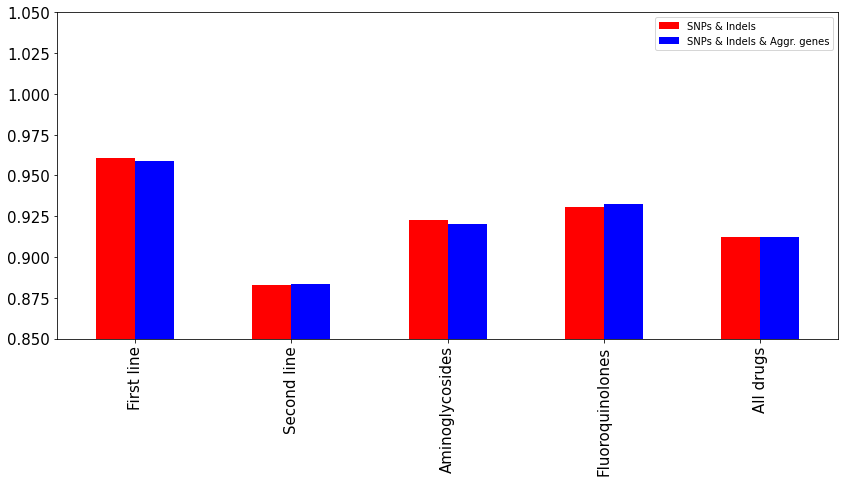

<Figure size 2160x4320 with 0 Axes>

In [13]:
result = pd.DataFrame(columns=['SNPs & Indels', "SNPs & Indels & Aggr. genes", 'p-value'])
k = 0
for drug in drugs:
    data = pd.read_csv(f"{snp_indel_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    temp_1 = data[['n_iter', 'auc']].groupby('n_iter').mean()
    
    data = pd.read_csv(f"{snp_indel_aggr_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    temp_2 = data[['n_iter', 'auc']].groupby('n_iter').mean()
    
    pvalue = ttest_rel(temp_1['auc'], temp_2['auc'])[1]
    
    result.loc[drug] = [temp_1.mean()[0], temp_2.mean()[0], pvalue]
    k += 1
    
new_result = pd.DataFrame(columns=['SNPs & Indels', "SNPs & Indels & Aggr. genes"])
for key in groups.keys():
    new_result.loc[key] = np.mean(result.loc[groups[key]])
    
xticks = new_result.index
Scores = new_result[['SNPs & Indels', "SNPs & Indels & Aggr. genes"]]

names = ['SNPs & Indels', "SNPs & Indels & Aggr. genes"]
fig, ax = plt.subplots()

pd.DataFrame(Scores, index=xticks, columns=names).plot.bar(figsize=(14,6), ylim=(0.85, 1.05), 
                                                           fontsize=15, ax=ax, color=['red', 'blue'])
plt.figure(figsize=(30,60))


plt.show()

## Comparation feature sets (Supplement tables - S2-S7,9,10)

### Comparation indels and SNPs with and without PFAM, AUC metric (Table S2)

In [15]:
result = pd.DataFrame(index=drugs, columns=['ROC AUC, SNPs & Indels without filtration', 
                                            'ROC AUC, SNPs & Indels & PFAM'])

result_1 = pd.DataFrame(columns=drugs)
result_2 = pd.DataFrame(columns=drugs)
k = 0

for drug in drugs:
    data = pd.read_csv(f"{snp_indel_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    result_1.loc[:,drug] = data[['n_iter', 'auc']].groupby('n_iter').mean()['auc']
    
    data = pd.read_csv(f"{snp_indel_pfam_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)    
    result_2.loc[:,drug] = data[['n_iter', 'auc']].groupby('n_iter').mean()['auc']
    
for key in drug_with_groups.keys():
    if type(drug_with_groups[key]) == list:
        temp_1 = np.mean(result_1[drug_with_groups[key]], axis=1)
    else:
        temp_1 = result_1[drug_with_groups[key]]
    
    if type(drug_with_groups[key]) == list:
        temp_2 = np.mean(result_2[drug_with_groups[key]], axis=1)
    else:
        temp_2 = result_2[drug_with_groups[key]]
        
    p_value = wilcoxon(temp_1.values, temp_2.values)[1]
    
    result.loc[key, 'ROC AUC, SNPs & Indels without filtration'] = temp_1.mean()
    result.loc[key, 'ROC AUC, SNPs & Indels & PFAM'] = temp_2.mean()
    result.loc[key, 'p_value'] = p_value
    
    result.to_csv(f"{output_dir}/TableS2.csv", sep='\t', index=True, header=True)

### Comparation indels and SNPs with and without 'Broken' features, AUC metric (Table S3)

In [5]:
result = pd.DataFrame(index=drugs, columns=['ROC AUC, SNPs & Indels without filtration', 
                                            'ROC AUC, SNPs & Indels & Broken genes'])

result_1 = pd.DataFrame(columns=drugs)
result_2 = pd.DataFrame(columns=drugs)
k = 0

for drug in drugs:
    data = pd.read_csv(f"{snp_indel_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    result_1.loc[:,drug] = data[['n_iter', 'auc']].groupby('n_iter').mean()['auc']
    
    data = pd.read_csv(f"{snp_indel_broken_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)    
    result_2.loc[:,drug] = data[['n_iter', 'auc']].groupby('n_iter').mean()['auc']

for key in drug_with_groups.keys():
    if type(drug_with_groups[key]) == list:
        temp_1 = np.mean(result_1[drug_with_groups[key]], axis=1)
    else:
        temp_1 = result_1[drug_with_groups[key]]
    
    if type(drug_with_groups[key]) == list:
        temp_2 = np.mean(result_2[drug_with_groups[key]], axis=1)
    else:
        temp_2 = result_2[drug_with_groups[key]]
        
    p_value = wilcoxon(temp_1.values, temp_2.values)[1]
    
    result.loc[key, 'ROC AUC, SNPs & Indels without filtration'] = temp_1.mean()
    result.loc[key, 'ROC AUC, SNPs & Indels & Broken genes'] = temp_2.mean()
    result.loc[key, 'p_value'] = p_value
    
    result.to_csv(f"{output_dir}/TableS3.csv", sep='\t', index=True, header=True)

### Comparation indels and SNPs with and without aggregated features, AUC metric (Table S4)

In [6]:
result = pd.DataFrame(index=drugs, columns=['ROC AUC, SNPs & Indels without filtration', 
                                            'ROC AUC, SNPs & Indels & Aggr. genes'])

result_1 = pd.DataFrame(columns=drugs)
result_2 = pd.DataFrame(columns=drugs)
k = 0

for drug in drugs:
    data = pd.read_csv(f"{snp_indel_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    result_1.loc[:,drug] = data[['n_iter', 'auc']].groupby('n_iter').mean()['auc']
    
    data = pd.read_csv(f"{snp_indel_aggr_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)    
    result_2.loc[:,drug] = data[['n_iter', 'auc']].groupby('n_iter').mean()['auc']
    
for key in drug_with_groups.keys():
    if type(drug_with_groups[key]) == list:
        temp_1 = np.mean(result_1[drug_with_groups[key]], axis=1)
    else:
        temp_1 = result_1[drug_with_groups[key]]
    
    if type(drug_with_groups[key]) == list:
        temp_2 = np.mean(result_2[drug_with_groups[key]], axis=1)
    else:
        temp_2 = result_2[drug_with_groups[key]]
        
    p_value = wilcoxon(temp_1.values, temp_2.values)[1]
    
    result.loc[key, 'ROC AUC, SNPs & Indels without filtration'] = temp_1.mean()
    result.loc[key, 'ROC AUC, SNPs & Indels & Aggr. genes'] = temp_2.mean()
    result.loc[key, 'p_value'] = p_value
    
    result.to_csv(f"{output_dir}/TableS4.csv", sep='\t', index=True, header=True)

### Comparation indels and SNPs with and without PFAM, F1 metric (Table S5)

In [8]:
# PFAM, F1
result = pd.DataFrame(index=drugs, columns=['F1, SNPs & Indels without filtration', 
                                            'F1, SNPs & Indels & PFAM'])

result_1 = pd.DataFrame(columns=drugs)
result_2 = pd.DataFrame(columns=drugs)
k = 0

for drug in drugs:
    data = pd.read_csv(f"{snp_indel_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    data['f1_score'] = f1_score(data['TP'], data['FP'], data['FN'])
    result_1.loc[:,drug] = data[['n_iter', 'f1_score']].groupby('n_iter').mean()['f1_score']
    
    data = pd.read_csv(f"{snp_indel_pfam_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)    
    data['f1_score'] = f1_score(data['TP'], data['FP'], data['FN'])
    result_2.loc[:,drug] = data[['n_iter', 'f1_score']].groupby('n_iter').mean()['f1_score']
    
for key in drug_with_groups.keys():
    if type(drug_with_groups[key]) == list:
        temp_1 = np.mean(result_1[drug_with_groups[key]], axis=1)
    else:
        temp_1 = result_1[drug_with_groups[key]]
    
    if type(drug_with_groups[key]) == list:
        temp_2 = np.mean(result_2[drug_with_groups[key]], axis=1)
    else:
        temp_2 = result_2[drug_with_groups[key]]
        
    p_value = wilcoxon(temp_1.values, temp_2.values)[1]
    
    result.loc[key, 'F1, SNPs & Indels without filtration'] = temp_1.mean()
    result.loc[key, 'F1, SNPs & Indels & PFAM'] = temp_2.mean()
    result.loc[key, 'p_value'] = p_value
    
    result.to_csv(f"{output_dir}/TableS5.csv", sep='\t', index=True, header=True)

### Comparation indels and SNPs with and without 'Broken' features, F1 metric (Table S6)

In [9]:
result = pd.DataFrame(index=drugs, columns=['F1, SNPs & Indels without filtration', 
                                            'F1, SNPs & Indels & Broken genes'])

result_1 = pd.DataFrame(columns=drugs)
result_2 = pd.DataFrame(columns=drugs)
k = 0

for drug in drugs:
    data = pd.read_csv(f"{snp_indel_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    data['f1_score'] = f1_score(data['TP'], data['FP'], data['FN'])
    result_1.loc[:,drug] = data[['n_iter', 'f1_score']].groupby('n_iter').mean()['f1_score']
    
    data = pd.read_csv(f"{snp_indel_broken_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)    
    data['f1_score'] = f1_score(data['TP'], data['FP'], data['FN'])
    result_2.loc[:,drug] = data[['n_iter', 'f1_score']].groupby('n_iter').mean()['f1_score']
    
for key in drug_with_groups.keys():
    if type(drug_with_groups[key]) == list:
        temp_1 = np.mean(result_1[drug_with_groups[key]], axis=1)
    else:
        temp_1 = result_1[drug_with_groups[key]]
    
    if type(drug_with_groups[key]) == list:
        temp_2 = np.mean(result_2[drug_with_groups[key]], axis=1)
    else:
        temp_2 = result_2[drug_with_groups[key]]
        
    p_value = wilcoxon(temp_1.values, temp_2.values)[1]
    
    result.loc[key, 'F1, SNPs & Indels without filtration'] = temp_1.mean()
    result.loc[key, 'F1, SNPs & Indels & Broken genes'] = temp_2.mean()
    result.loc[key, 'p_value'] = p_value
    
    result.to_csv(f"{output_dir}/TableS6.csv", sep='\t', index=True, header=True)

### Comparation indels and SNPs with and without aggregated features, F1 metric (Table S7)

In [18]:
result = pd.DataFrame(index=drugs, columns=['F1, SNPs & Indels without filtration', 
                                            'F1, SNPs & Indels & Aggr. genes'])

result_1 = pd.DataFrame(columns=drugs)
result_2 = pd.DataFrame(columns=drugs)
k = 0

for drug in drugs:
    data = pd.read_csv(f"{snp_indel_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    data['f1_score'] = f1_score(data['TP'], data['FP'], data['FN'])
    result_1.loc[:,drug] = data[['n_iter', 'f1_score']].groupby('n_iter').mean()['f1_score']
    
    data = pd.read_csv(f"{snp_indel_aggr_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)    
    data['f1_score'] = f1_score(data['TP'], data['FP'], data['FN'])
    result_2.loc[:,drug] = data[['n_iter', 'f1_score']].groupby('n_iter').mean()['f1_score']
    
for key in drug_with_groups.keys():
    if type(drug_with_groups[key]) == list:
        temp_1 = np.mean(result_1[drug_with_groups[key]], axis=1)
    else:
        temp_1 = result_1[drug_with_groups[key]]
    
    if type(drug_with_groups[key]) == list:
        temp_2 = np.mean(result_2[drug_with_groups[key]], axis=1)
    else:
        temp_2 = result_2[drug_with_groups[key]]
        
    p_value = wilcoxon(temp_1.values, temp_2.values)[1]
    
    result.loc[key, 'F1, SNPs & Indels without filtration'] = temp_1.mean()
    result.loc[key, 'F1, SNPs & Indels & Aggr. genes'] = temp_2.mean()
    result.loc[key, 'p_value'] = p_value
    
    result.to_csv(f"{output_dir}/TableS7.csv", sep='\t', index=True, header=True)

### Comparation indels & SNPs with PFAM features and aggregated features, AUC metric (Table S9)

In [11]:
# PFAM vs Aggr, AUC
result = pd.DataFrame(index=drugs, columns=['ROC AUC, SNPs & Indels & PFAM', 
                                            'ROC AUC, SNPs & Indels & Aggr. genes'])

result_1 = pd.DataFrame(columns=drugs)
result_2 = pd.DataFrame(columns=drugs)
k = 0

for drug in drugs:
    data = pd.read_csv(f"{snp_indel_pfam_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    result_1.loc[:,drug] = data[['n_iter', 'auc']].groupby('n_iter').mean()['auc']
    
    data = pd.read_csv(f"{snp_indel_aggr_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)    
    result_2.loc[:,drug] = data[['n_iter', 'auc']].groupby('n_iter').mean()['auc']
    
for key in drug_with_groups.keys():
    if type(drug_with_groups[key]) == list:
        temp_1 = np.mean(result_1[drug_with_groups[key]], axis=1)
    else:
        temp_1 = result_1[drug_with_groups[key]]
    
    if type(drug_with_groups[key]) == list:
        temp_2 = np.mean(result_2[drug_with_groups[key]], axis=1)
    else:
        temp_2 = result_2[drug_with_groups[key]]
        
    p_value = wilcoxon(temp_1.values, temp_2.values)[1]
    
    result.loc[key, 'ROC AUC, SNPs & Indels & PFAM'] = temp_1.mean()
    result.loc[key, 'ROC AUC, SNPs & Indels & Aggr. genes'] = temp_2.mean()
    result.loc[key, 'p_value'] = p_value
    
    result.to_csv(f"{output_dir}/TableS9.csv", sep='\t', index=True, header=True)

### Comparation indels & SNPs with PFAM features and aggregated features, F1 metric (Table S10)

In [12]:
# Aggr vs PDAM, AUC
result = pd.DataFrame(index=drugs, columns=['F1, SNPs & Indels & PFAM', 
                                            'F1, SNPs & Indels & Aggr. genes'])

result_1 = pd.DataFrame(columns=drugs)
result_2 = pd.DataFrame(columns=drugs)
k = 0

for drug in drugs:
    data = pd.read_csv(f"{snp_indel_pfam_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)
    data['f1_score'] = f1_score(data['TP'], data['FP'], data['FN'])
    result_1.loc[:,drug] = data[['n_iter', 'f1_score']].groupby('n_iter').mean()['f1_score']
    
    data = pd.read_csv(f"{snp_indel_aggr_dir}/{drug}/result.csv", sep='\t', index_col=None, header=0)    
    data['f1_score'] = f1_score(data['TP'], data['FP'], data['FN'])
    result_2.loc[:,drug] = data[['n_iter', 'f1_score']].groupby('n_iter').mean()['f1_score']
    
for key in drug_with_groups.keys():
    if type(drug_with_groups[key]) == list:
        temp_1 = np.mean(result_1[drug_with_groups[key]], axis=1)
    else:
        temp_1 = result_1[drug_with_groups[key]]
    
    if type(drug_with_groups[key]) == list:
        temp_2 = np.mean(result_2[drug_with_groups[key]], axis=1)
    else:
        temp_2 = result_2[drug_with_groups[key]]
        
    p_value = wilcoxon(temp_1.values, temp_2.values)[1]
    
    result.loc[key, 'F1, SNPs & Indels & PFAM'] = temp_1.mean()
    result.loc[key, 'F1, SNPs & Indels & Aggr. genes'] = temp_2.mean()
    result.loc[key, 'p_value'] = p_value
    
    result.to_csv("TableS10.csv", sep='\t', index=True, header=True)